# Simplex Projection of Climate/Vegetation

Sugihara & May 1990: https://www.nature.com/articles/344734a0

https://sugiharalab.github.io/EDM_Documentation/edm_functions/#simplex

In [2]:
from pyEDM import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import itertools

In [3]:
#Here is the main directory
OROMIA_TS_DIR = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_df_normalized/'
#save figures to this folder
FIGURES = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Figures/'
SMOOTHED_DIR = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/smoothed/'

#Directory for seasonal decomposed time series
OROMIA_TS_DS = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_df_seasonaldecomposed/'

In [4]:
def simplex_error(in_dir, file, var1, var2, train, test):
    '''
    This function computes the simplex prediction skill for a combination of embedding dimensions and prediction intervals for a given land cover and environmental variable
    The result is a nested list of error values that will be input into the following function to create a dataframe
    Args:
    - in_dir: input directory 
    - file: filename (string)
    - var1: training variable (string)
    - var2: testing variable (string) (often training and testing the same)
    - train: portion of data library used to train (string of range with space between values)
    - test: portion of data libary used to test (string of range with space between values) 
    
    '''
    
    
    #param_range = list(itertools.product(list(range(1,11)), repeat = 2)) #combination of pairs with repeat values
    param_range = list(itertools.product(list(range(1,19)), repeat = 2))[:180] #cut off at 180 because we are only interested in the first 10 embedding dimensions but 18 dekads forward 
    output = []
   
    for i in param_range:  
        simplex_result = Simplex(pathIn = in_dir, dataFile = file, lib = train, pred = test, E = i[0], Tp = i[1], columns = var1, target = var2, showPlot = False)
        error = ComputeError(list(simplex_result.Observations), list(simplex_result.Predictions))
        MAE = list(error.values())[0]
        RMSE = list(error.values())[1]
        rho = list(error.values())[2]
        output.append(MAE) #change depending on error parameter of interest
        
    return [output]
             
def simplex_error_df(error_lists):
    
    '''
    This function takes the errors values and creates a dataframe of prediction skill combinations
    Args:
    - error_list: nested list of error values from simplex combinations 
    
    '''
    
    for i in error_lists:
        chunks = np.array_split(np.array(i), 10)
        df = pd.DataFrame(np.vstack(chunks))
        
    return df
    
    

In [5]:
tst = simplex_error(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'NDVI', 'NDVI', '1 100', '101 522')
#tst
simplex_error_df(tst)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.228450,0.443998,0.639457,0.784887,0.880089,0.910127,0.900107,0.897928,0.897808,0.889637,0.867676,0.833128,0.785092,0.723445,0.666809,0.625684,0.598220,0.573795
1,0.145014,0.259762,0.362254,0.441478,0.498138,0.507953,0.511440,0.528907,0.555520,0.579648,0.592899,0.605766,0.602630,0.579684,0.546065,0.509124,0.485356,0.467481
2,0.158807,0.260503,0.349791,0.419722,0.464546,0.476325,0.487984,0.516622,0.549634,0.575546,0.586563,0.585294,0.557938,0.513929,0.480529,0.456627,0.440155,0.430731
3,0.190382,0.286156,0.364933,0.421980,0.452175,0.464669,0.484619,0.513389,0.542096,0.556537,0.561258,0.537306,0.501296,0.467801,0.444192,0.427193,0.418459,0.414353
4,0.218485,0.303031,0.374630,0.422976,0.447553,0.465523,0.485323,0.507977,0.524368,0.531355,0.521806,0.493195,0.460190,0.438292,0.425844,0.415658,0.407053,0.411294
5,0.235136,0.310981,0.372305,0.414574,0.438102,0.451277,0.469014,0.482543,0.492723,0.499097,0.484037,0.459011,0.431474,0.415064,0.403834,0.395338,0.396155,0.409458
6,0.231606,0.300462,0.355600,0.393561,0.413477,0.426483,0.434624,0.441793,0.451815,0.456800,0.447365,0.429244,0.405680,0.389907,0.379571,0.377416,0.388199,0.401734
7,0.237412,0.298065,0.347888,0.382389,0.399833,0.405054,0.408167,0.417328,0.426502,0.432325,0.424217,0.407032,0.387803,0.374015,0.366088,0.370288,0.381813,0.393905
8,0.242700,0.300209,0.347218,0.378249,0.392574,0.396723,0.400064,0.405196,0.409541,0.409989,0.400058,0.385919,0.370159,0.358057,0.357049,0.366217,0.378090,0.388218
9,0.249680,0.305315,0.347915,0.374462,0.387698,0.393229,0.396055,0.396183,0.394295,0.388200,0.377455,0.365250,0.352478,0.347107,0.351023,0.361855,0.373477,0.382038


In [6]:
spx_ndvi_croplands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'NDVI', 'NDVI', '1 100', '101 522')
spx_ndvi_grasslands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'NDVI', 'NDVI', '1 100', '101 522')
spx_ndvi_savannas_rho = simplex_error(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'NDVI', 'NDVI', '1 100', '101 522')

spx_precip_croplands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'P', 'P', '1 100', '101 522')
spx_precip_grasslands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'P', 'P', '1 100', '101 522')
spx_precip_savannas_rho = simplex_error(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'P', 'P', '1 100', '101 522')

spx_sm_croplands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'SM', 'SM', '1 100', '101 522')
spx_sm_grasslands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'SM', 'SM', '1 100', '101 522')
spx_sm_savannas_rho = simplex_error(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'SM', 'SM', '1 100', '101 522')

spx_lst_croplands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'LST', 'LST', '1 100', '101 522')
spx_lst_grasslands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'LST', 'LST', '1 100', '101 522')
spx_lst_savannas_rho = simplex_error(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'LST', 'LST', '1 100', '101 522')

spx_temp_croplands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'TMP', 'TMP', '1 100', '101 522')
spx_temp_grasslands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'TMP', 'TMP', '1 100', '101 522')
spx_temp_savannas_rho = simplex_error(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'TMP', 'TMP', '1 100', '101 522')

spx_et_croplands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_croplands_df_norm.csv', 'refET', 'refET', '1 100', '101 522')
spx_et_grasslands_rho = simplex_error(OROMIA_TS_DIR, 'oromia_grasslands_df_norm.csv', 'refET', 'refET', '1 100', '101 522')
spx_et_savannas_rho = simplex_error(OROMIA_TS_DIR, 'oromia_savannas_df_norm.csv', 'refET', 'refET', '1 100', '101 522')


In [7]:
spx_ndvi_croplands_rho_df = simplex_error_df(spx_ndvi_croplands_rho)
spx_ndvi_grasslands_rho_df = simplex_error_df(spx_ndvi_grasslands_rho)
spx_ndvi_savannas_rho_df = simplex_error_df(spx_ndvi_savannas_rho)

spx_precip_croplands_rho_df = simplex_error_df(spx_precip_croplands_rho)
spx_precip_grasslands_rho_df = simplex_error_df(spx_precip_grasslands_rho)
spx_precip_savannas_rho_df = simplex_error_df(spx_precip_savannas_rho)

spx_sm_croplands_rho_df = simplex_error_df(spx_sm_croplands_rho)
spx_sm_grasslands_rho_df = simplex_error_df(spx_sm_grasslands_rho)
spx_sm_savannas_rho_df = simplex_error_df(spx_sm_savannas_rho)

spx_lst_croplands_rho_df = simplex_error_df(spx_lst_croplands_rho)
spx_lst_grasslands_rho_df = simplex_error_df(spx_lst_grasslands_rho)
spx_lst_savannas_rho_df = simplex_error_df(spx_lst_savannas_rho)

spx_temp_croplands_rho_df = simplex_error_df(spx_temp_croplands_rho)
spx_temp_grasslands_rho_df = simplex_error_df(spx_temp_grasslands_rho)
spx_temp_savannas_rho_df = simplex_error_df(spx_temp_savannas_rho)

spx_et_croplands_rho_df = simplex_error_df(spx_et_croplands_rho)
spx_et_grasslands_rho_df = simplex_error_df(spx_et_grasslands_rho)
spx_et_savannas_rho_df = simplex_error_df(spx_et_savannas_rho)


# Plot Simplex Projection Error Across Variables and Land Cover Types

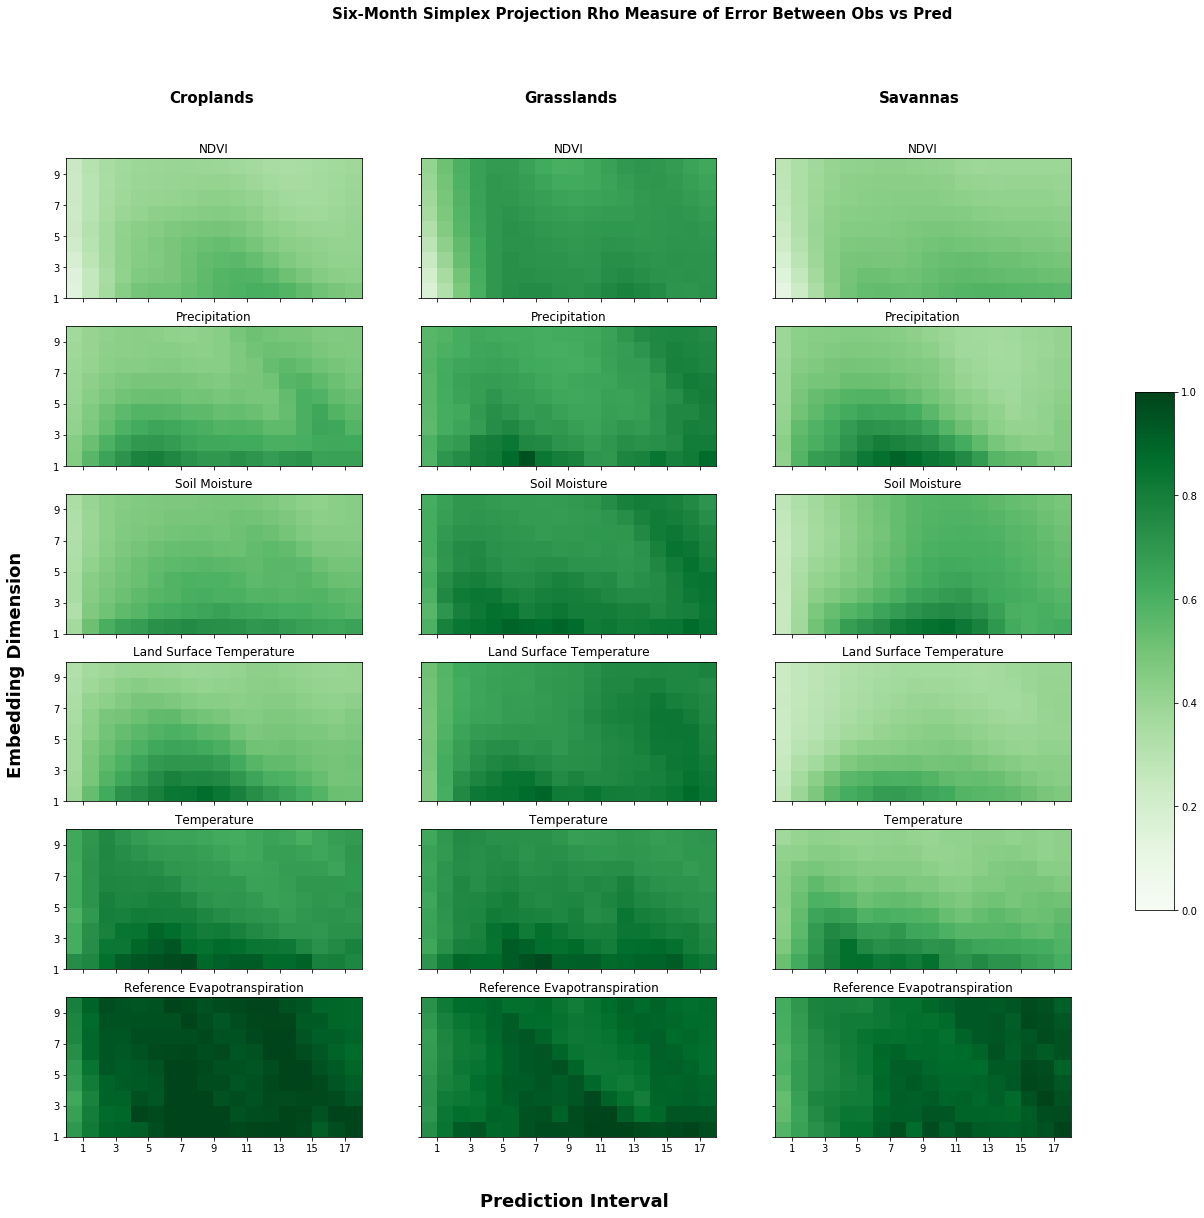

In [10]:
fig, axs = plt.subplots(6, 3, figsize=(18,18), sharex=True, sharey=True)
axs = axs.ravel()
fig = plt.gcf()
var_list = ['NDVI', 'Precip', 'SM', 'LST', 'Temp', 'RefET']
lc_list = ['Croplands', 'Grasslands', 'Savannas']


df_list = [spx_ndvi_croplands_rho_df, spx_ndvi_grasslands_rho_df, spx_ndvi_savannas_rho_df, 
          spx_precip_croplands_rho_df, spx_precip_grasslands_rho_df, spx_precip_savannas_rho_df, 
          spx_sm_croplands_rho_df, spx_sm_grasslands_rho_df, spx_sm_savannas_rho_df, 
          spx_lst_croplands_rho_df, spx_lst_grasslands_rho_df, spx_lst_savannas_rho_df, 
          spx_temp_croplands_rho_df, spx_temp_grasslands_rho_df, spx_temp_savannas_rho_df, 
          spx_et_croplands_rho_df, spx_et_grasslands_rho_df, spx_et_savannas_rho_df]

for i, data in enumerate(df_list):
    xlim = [0,18] #change depending on dekad time period into future of interest
    ylim = [1,10]
    xticks = list(range(1,19, 2)) 
    yticks = list(range(1,11, 2))
    im = axs[i].pcolor(data, cmap = 'Greens', vmin = 0, vmax  = 1)
    axs[i].pcolor(data, cmap = 'Greens', vmin = 0, vmax  = 1)
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(ylim)
    axs[i].set_xticks(xticks)
    axs[i].set_yticks(yticks)
    
    if i<3:
        axs[i].set_title('NDVI')
    if 2<i<6:
        axs[i].set_title('Precipitation')
    if 5<i<9:
        axs[i].set_title('Soil Moisture')
    if 8<i<12:
        axs[i].set_title('Land Surface Temperature')
    if 11<i<15:
        axs[i].set_title('Temperature')
    if i>14:
        axs[i].set_title('Reference Evapotranspiration')
    
axs[0].text(0.35, 1.4, 'Croplands', transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(1.55, 1.4, 'Grasslands', transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(2.75, 1.4, 'Savannas', transform=axs[0].transAxes, size=15, fontweight='bold')
axs[0].text(1.4, -6.5, 'Prediction Interval', transform=axs[0].transAxes, size=18, fontweight='bold')
axs[0].text(-0.2, -3.4, 'Embedding Dimension', transform=axs[0].transAxes, size=18, fontweight='bold', rotation = 90)
axs[9].text(0.9, 2, 'Six-Month Simplex Projection Rho Measure of Error Between Obs vs Pred ', transform=axs[0].transAxes, size=15, fontweight='bold')

cbar_ax = fig.add_axes([0.95, .3, .03, .4])
fig.colorbar(im, cax=cbar_ax)
plt.savefig('/home/rgreen/simplex_rho_6mo.png', dpi = 500)

# Plot Simplex Error

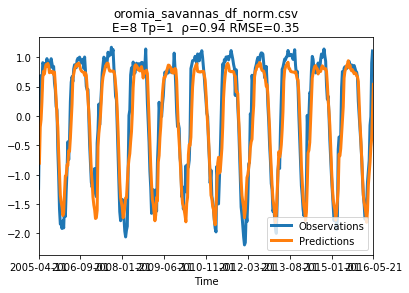

In [333]:
test = Simplex(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_savannas_df_norm.csv', lib = '1 100', pred = '101 500', E = 8, columns = 'SM', target = 'SM', showPlot = True)

In [334]:
test

,Time,Observations,Predictions
0,2005-04-11,-1.233318,NaN
1,2005-04-21,-0.208050,-0.803547
2,2005-05-01,0.684396,-0.188613
3,2005-05-11,0.256602,-0.061069
4,2005-05-21,0.538047,0.239225
...,...,...,...
396,2016-04-11,-0.158415,-0.797413
397,2016-04-21,-0.011371,-0.532825
398,2016-05-01,0.901566,-0.379022
399,2016-05-11,1.106891,0.076776


In [335]:
ComputeError(list(test.Observations), list(test.Predictions))

{'MAE': 0.2614244975440288,
 'RMSE': 0.35493816504457654,
 'rho': 0.9407007557773299}